<a href="https://colab.research.google.com/github/rashedalsharqi/cs-167-notes/blob/main/Day11_Scikit_Learn_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day11
## Scikit Learn Practice

#### CS167: Machine Learning, Spring 2023

Thursday, March 2nd, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

You should be working on:
- [Notebook #4:](https://classroom.github.com/a/nOppDGyi) Intro to Scikit Learn
    - **Due**: Tuesday, 3/7 by 11:59pm

- Tuesday: Random Forests
- Thursday: Project #1

# Introduction to Scikit Learn:

`scikit-learn` is one of Python's main Machine Learning Libraries.
- built on `NumPy`, `SciPy`, and `matplotlib`
- plays nicely with `pandas`
- https://scikit-learn.org/stable/ 

# Overview of the Scikit Learn 'Algorithm': 

When working in Scikit Learn (`sklearn`), there is a general pattern that we can follow to implement any supported machine learning algorithm.

It goes like this: 
1. Load your data using `pd.read_csv()`
2. Split your data `train_test_split()`
3. Create your classifier/regressor object
4. Call `fit()` to train your model
5. Call `predict()` to get predictions
6. Call a metric function to measure the performance of your model.

## All together, it looks something like this:

In [1]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
path = '/content/drive/MyDrive/datasets/irisData.csv' #'/content/drive/MyDrive/CS167/datasets/irisData.csv'
iris_data = pandas.read_csv(path)

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))
     

Accuracy: 0.9
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versic

# Now, let's go through step-by-step:

## Step 1: Import libraries and load your data

We should be pretty familiar with this one.
- mount your drive
- import any relevant libraires
- use `pd.read_csv()` to load in your dataset

In [4]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
path = '/content/drive/MyDrive/datasets/irisData.csv' #'/content/drive/MyDrive/CS167/datasets/irisData.csv'
iris_data = pandas.read_csv(path)

## Step 2: Split Data

Cross-Validation is an important step in machine learning which enables us to evaluate our models. To do this, we need to split our data into `train_data` and `test_data`.
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day04_cross_validation.png?raw=1" width=600/>
</div>

Sklearn takes this a step futher and splits the data up into 4 pieces: 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day06_traintestsplit.png?raw=1" width=600/>
</div>

- `train_data`: holds the predictor variables of the training set
- `train_sln`: holds the target variable of the training set
- `test_data`: holds the predictor variables of the testing set
- `test_sln`: holds the target varibles of the testing set

## Step 2: Splitting Data (the code)

In [7]:
#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
#predictors = data.columns.drop('species')
target = "species"
train_data, test_data, train_sln, test_sln = train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

In [8]:
# take a look at the data... make sure you understand what split of data is stored in each 
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

train_data.head()

train_data shape:  (120, 4)
test_data shape:  (30, 4)
train_sln shape:  (120,)
test_sln shape:  (30,)


,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


## Step 3: Create classifier/regressor object

The syntax/wording for this is going to come directly from the `sklearn` documentation.
- [Scikit Learn Decision Tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

The name of the model will change based on whether you are doing a __classification__ or __regression__. 
- generally in the name: 
    - `tree.DecicionTreeClassifier()`
    - `tree.DecisionTreeRegressor()`

In [9]:
#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier()

## Step 4: Call `fit()` to train the model

Each machine learning model has a training process associated with it. Scikit learn makes it easy to train whatever model you choose by simply calling `fit()` on that model. 

We generally pass two things into `fit()`:
- `train_data`: the predictor variables we want to train our model on
- `train_sln`: the labels for each training examples


In [10]:
dt.fit(train_data, train_sln)

DecisionTreeClassifier()

## Step 5: Call `predict()` to get predictions

After our model is trained, it's time to run our testing data through our model and see what the model predicts. 

Scikit learn lets us do this in one line: 
- we're saving what the function is returning as `predictions`
- passing in `test_data`, which is the data without labels that was not included in training

In [11]:
predictions = dt.predict(test_data)

# Step 6: Evaluate the Model

Now that we have some predictions, we need to check to see how close we were by passing our predictions and the actual correct answers into a metric function. 

| **Type of ML** | **Metric**                | **Description**                                                                                       | Scikit Learn                                                                                                                                                            |
|----------------|---------------------------|:-------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Classification | Accuracy                  | Number correct examples divided by total number                                                       | [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)                                               |
| Classification | Confusion Matrix          | Detailed table of where our model got confused.                                                       | [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)          |
| Regression     | Mean Absolute Error (MAE) | The average absolute distance from the target variable                                                | [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) |
| Regression     | Mean Squared Error (MSE)  | The average squared distance from the target variable                                                 | [`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)    |
| Regression     | $R^2$                     | 1: perfectly fit data 0: same performance as guessing the mean of the target variable -1: really bad. | [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)                                  |

Available metrics can be found in the sklearn documentation [[sklearn metrics]](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [12]:
from sklearn import metrics
#6. call a metric function to evaluate the model
print("Accuracy:", metrics.accuracy_score(test_sln, predictions))

Accuracy: 0.8333333333333334


### Here's an example of displaying a confusion matrix:

Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay 


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=iris_labels)
print(conf_mat)

[[9 0 0]
 [0 8 3]
 [0 2 8]]


                 Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa                9                0               0
Iris-versicolor            0                8               3
Iris-virginica             0                2               8


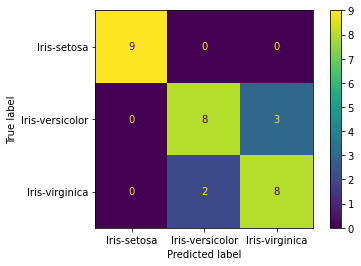

In [14]:
#displaying a confusion matrix

# option #1: text
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

# option #2: prettify
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=iris_labels)
displ.plot()
plt.show()

# Normalizing using `StandardScaler`

**Documentation**: [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [15]:
train_data.head()

,sepal length,sepal width,petal length,petal width
79,5.7,2.6,3.5,1.0
54,6.5,2.8,4.6,1.5
106,4.9,2.5,4.5,1.7
90,5.5,2.6,4.4,1.2
145,6.7,3.0,5.2,2.3


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
train_data_normalized

array([[-0.18688501, -1.09883199, -0.14183598, -0.25284018],
       [ 0.77252466, -0.6472572 ,  0.47403077,  0.39546797],
       [-1.14629467, -1.32461939,  0.41804288,  0.65479123],
       [-0.42673742, -1.09883199,  0.362055  ,  0.00648308],
       [ 1.01237707, -0.19568241,  0.80995808,  1.43276101],
       [-0.0669588 ,  2.06219154, -1.42955736, -1.29013322],
       [ 1.25222949,  0.03010499,  0.7539702 ,  1.43276101],
       [ 0.65259845,  0.25589238,  0.41804288,  0.39546797],
       [ 1.25222949,  0.03010499,  0.92193386,  1.17343775],
       [ 0.05296741,  0.25589238,  0.58600654,  0.78445286],
       [ 0.41274603, -0.4214698 ,  0.30606711,  0.13614471],
       [-0.18688501, -0.6472572 ,  0.41804288,  0.13614471],
       [-0.78651605,  2.28797894, -1.2615937 , -1.41979485],
       [ 0.77252466, -0.19568241,  1.1458854 ,  1.30309938],
       [ 0.53267224,  0.70746717,  1.03390963,  1.56242264],
       [-0.18688501,  1.61061675, -1.14961793, -1.16047159],
       [ 1.01237707, -1.

# Scikit Learn Practice:

# 💬 Group Exercise #1:

1. Build a knn (try using [`sklearn.neighbors.kNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) and use it on the Iris Dataset
    - is there a difference in performance between using a **weighted** or **unweighted** knn?
    - what if you change the number of nearest neighbors to 21?

In [18]:
# build your model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# use fit() to train your model
knn.fit(train_data, train_sln)
# get predictions on the test_data
knn_preds = knn.predict(test_data)
# see how close your predictions were using an appropriate metric
knn_acc = metrics.accuracy_score(test_sln, knn_preds)
knn_acc

0.9666666666666667

# Let's try regression now:

Using the `vehicles.csv` dataset, let's try out sklearn with regression:
- load the data, get the right subset
- set predictors and target variables
- use `train_test_split()` to split the data

In [19]:
# load in the vehicles.csv data for scikit learn
import pandas
import numpy
from sklearn.model_selection import train_test_split

# load data, get the right subset
path = '/content/drive/MyDrive/datasets/vehicles.csv' #'/content/drive/MyDrive/CS167/datasets/vehicles.csv'
data = pandas.read_csv(path)
gas_vehicles = data[data['fuelType']=='Regular'][['year', 'cylinders', 'displ', 'comb08']]
gas_vehicles.dropna(inplace=True)

# set the predictor variables and target variable
predictors= ['year', 'cylinders', 'displ']
target= 'comb08'

# use train_test_split() to split the data
train_data, test_data, train_sln, test_sln = train_test_split(gas_vehicles[predictors], gas_vehicles[target], test_size = 0.2, random_state=41)
train_data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,cylinders,displ
4256,1985,4.0,2.2
2685,1995,6.0,4.0
35058,2020,6.0,4.3
10678,1986,6.0,2.8
18702,1984,8.0,5.0


And then we do the next steps:
- build our model using `neighbors.KNeighborsRegressor()`
- fit our model using `fit()` and passing in `train_data` and `train_sln`
- get our predictions by calling `predict()`
- evaluate our predictions using `metrics.mean_squared_error()`, and `metrics.r2_score()`

In [20]:
from sklearn import neighbors
# create our model
knn = neighbors.KNeighborsRegressor(n_neighbors=21)

# fit (train) the model to the data
knn.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
preds = knn.predict(test_data)
# use a metric to see how good our predictions are
print("R2: ", metrics.r2_score(test_sln, preds))
print("MAE: ", metrics.mean_absolute_error(test_sln, preds))
print("MSE: ", metrics.mean_squared_error(test_sln, preds))

R2:  0.7841593641318946
MAE:  1.7524642768499805
MSE:  6.489376763363572


# 💬 Group Exercise #2: 🚗 🛺 🏎
Look up an appropriate Decision Tree algorithm and apply it to the vehicles data:
- https://scikit-learn.org/stable/modules/classes.html
- Using Default values of the decision tree, what is the $R^2$ metric?
- Interpret the $R^2$ value... is it good or bad?

In [21]:
from sklearn import tree 
#build the tree
dt = tree.DecisionTreeRegressor()
#train your model
dt.fit(train_data, train_sln)
#get predictions
preds = dt.predict(test_data)

r2 = metrics.r2_score(test_sln, preds)
r2

0.8077351776117996

# 💬 Group Exercise #3:
Change your decision tree to have a `max_depth` of 3. 
- does this help or hurt the decision tree performance?

Compare your decision tree to a kNN algorithm:
- what values of k seem to help the performance?
- What else can you do to help the performance?

Can you get a higher $R^2$ valuue using a knn algorithm or a decision tree?
- what does this indicate about the data?

# 💬 Group Exercise #4: 🐧🧊

Try out the `penguins_size.csv` dataset. 
- Scikit learn Deicsion Trees and kNN only work with numeric data. 
    - What will you need to do to get the penguin dataset to work? Hint: [`pandas.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) and [`pandas.DataFrame.replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) will help.
- What is the best accuracy you can get if you use `species` as the target variable? 
- Which model does the best?
- What parameters work the best?
- Does normalizing the data make a difference? If so, how?

In [26]:
import pandas as pd
penguins = pd.read_csv('/content/drive/MyDrive/datasets/penguins_size.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [27]:
# do pre-processing here: replace() and get_dummies() will help.
#remove missing data
penguins.dropna(inplace=True)

#get_dummies to take care of categorical data
dummies = pd.get_dummies(penguins, columns = ['island'])
dummies.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,MALE,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,MALE,0,0,1


In [29]:
# train_test_split
target= 'species'
predictors = penguins.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(penguins[predictors], penguins[target], test_size = 0.2, random_state=41)
train_data.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
343,Biscoe,49.9,16.1,213.0,5400.0,MALE
302,Biscoe,47.4,14.6,212.0,4725.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
179,Dream,49.5,19.0,200.0,3800.0,MALE
262,Biscoe,45.3,13.7,210.0,4300.0,FEMALE


In [ ]:
#build and test your models here


# 💬 Group Exercise #5: 🐧🧊

Now, switch the target variable from `species` to `body_mass_g`. This turns the problem into a regression.
- Find the model that works the best for this problem as a regression.
- What metric makes the most sense to use?
- What parameters give you the best performance?
- Does normalizing the data make a difference in the performance?

In [ ]:
penguins = pd.read_csv('datasets/penguins_size.csv')

In [ ]:
# pre-processing (replace() and get_dummies())


In [ ]:
target= 'body_mass_g'
predictors = penguins.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(penguins[predictors], penguins[target], test_size = 0.2, random_state=41)
train_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
214,Chinstrap,Dream,45.7,17.0,195.0,FEMALE
275,Gentoo,Biscoe,45.0,15.4,220.0,MALE
36,Adelie,Dream,38.8,20.0,190.0,MALE
202,Chinstrap,Dream,48.1,16.4,199.0,FEMALE
108,Adelie,Biscoe,38.1,17.0,181.0,FEMALE


In [ ]:
# build and test your models here:


# Notebook #4: Sklearn and Spotify 🎶

Link to accept: https://classroom.github.com/a/nOppDGyi

**Due**: Tuesday, March 7th, by 11:59pm

## Part 1: 
[3 points]** You must run at least 6 variations of the algorithms and display their results using an __appropriate regression metric__ (again, use the scikit-learn modules). I will be looking for the following to be included in your comparison:

* **weighted k-Nearest-Neighbor** with a **small value of k** (the same one you used for the unweighted version)
* **weighted k-Nearest-Neighbor** with a **large value of k **(the same one you used for the unweighted version)
* a **decision tree** with default parameter values
* a **decision tree**, setting some kind of parameter that results in a smaller tree 
* a **Random Forest**, with default parameter values
* a **Random Forest**, with a **change to the number of trees** used.

In [ ]:
import pandas as pd
songs = pd.read_csv('datasets/spotify.csv')
target= 'danceability'
predictors = ['energy', 'key', 'loudness','speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']
train_data, test_data, train_sln, test_sln = train_test_split(songs[predictors], songs[target], test_size = 0.2, random_state=41)
train_data.head()

/Users/100022114/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11181,0.856,1,-3.748,0.4100,0.1500,0.00000,0.0573,0.754,160.042,126290
24502,0.956,5,-6.746,0.0563,0.0113,0.87600,0.1120,0.188,128.006,264666
18293,0.667,4,-5.191,0.0508,0.5860,0.00000,0.1160,0.385,128.962,241688
17867,0.443,6,-10.216,0.0325,0.9040,0.00197,0.0718,0.338,187.950,208253
16641,0.585,10,-5.466,0.0332,0.5530,0.00000,0.1950,0.238,215.168,214884


## Part 2: w-kNN on Normalized data
Normalize the data and run a weighted k-Nearest Neighbors algorithm on it (from sklearn,  not the one we wrote from scratch). You can choose the k value. To Normalize, use the [`sklearn.preprocessing.StandardScalar`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from sklearn.

## Part 3:
Use a Markup cell to answer the following questions:
* What algorithm performed better? w-kNN, Decision Trees, or Random Forests? Why do you think this was the case?
* What effect did normalizing the data have on your results? Explain. 

# Work Time 📝

Use what time we have left to work on Notebook #4.